In [36]:
pip install ydata-profiling

In [47]:
#NB classifier 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
data = df_no_duplicates
X = df[['citric acid', 'sulphates', 'alcohol']]
y = df['type']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate the AUC
y_pred_prob = naive_bayes_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class
auc = roc_auc_score(y_test, y_pred_prob)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")

print(f"AUC: {auc}")

Accuracy: 0.6517857142857143
AUC: 0.7369817578772804


In [52]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport


In [41]:
df= pd.read_csv('red_wine.csv')

In [30]:
df1= pd.read_csv('white_wine.csv')

df1

,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low
...,...,...,...,...
73,0.12,0.36,13.8,high
74,0.24,0.74,13.8,low
75,0.15,0.77,13.8,high
76,0.27,0.27,13.9,high


Accuracy: 0.8035714285714286
AUC Score: 0.897190293742018


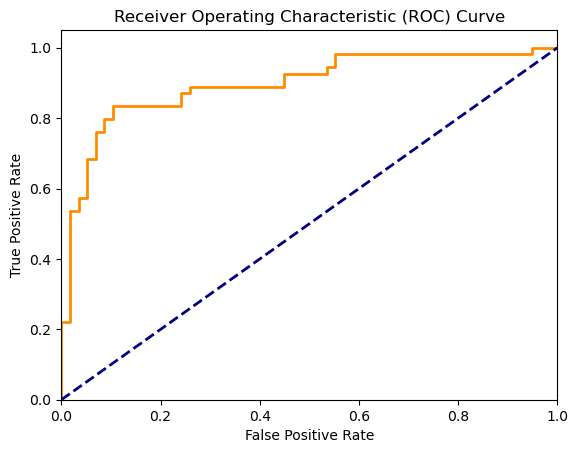

In [48]:
#SVMP_linear 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Sample data
data = df_no_duplicates
df = pd.DataFrame(data)

# Convert 'type' to numerical labels
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Features and target variable
X = df[['citric acid', 'sulphates', 'alcohol']]
y = df['type']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=0)  # Set probability=True to enable predict_proba
svm_model.fit(X_train, y_train)

# Predictions and predicted probabilities
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (binary classification)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))


# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


Accuracy: 0.48214285714285715
AUC Score: 0.85727969348659


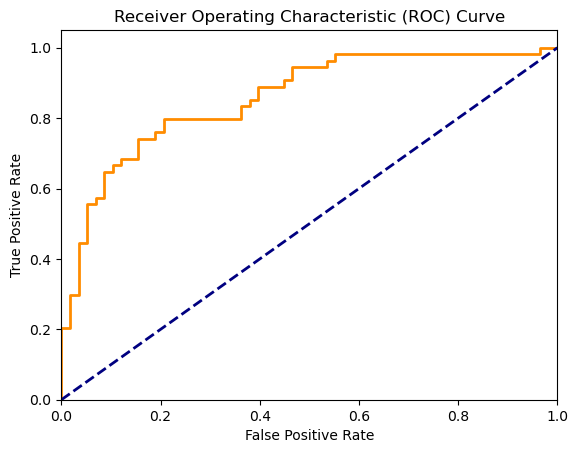

In [49]:
#SVM_RBF
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Sample data
data = df_no_duplicates
df = pd.DataFrame(data)

# Convert 'type' to numerical labels
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Features and target variable
X = df[['citric acid', 'sulphates', 'alcohol']]
y = df['type']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=0)  # Set probability=True to enable predict_proba
svm_model.fit(X_train, y_train)

# Predictions and predicted probabilities
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (binary classification)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


Accuracy: 0.875
AUC Score: 0.9426883780332056


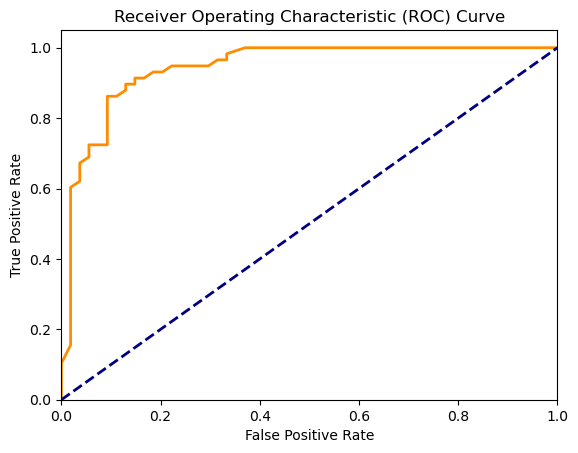

In [39]:
#RF
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Sample data
data = df_no_duplicates
df = pd.DataFrame(data)

# Convert 'type' to numerical labels
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Features and target variable
X = df[['citric acid', 'sulphates', 'alcohol']]
y = df['type']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predictions and predicted probabilities
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (binary classification)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))


# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


Accuracy: 0.875
AUC Score: 0.8717948717948718


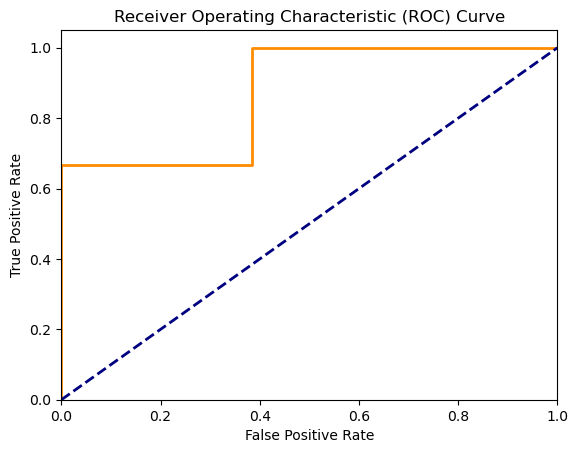

In [51]:
#RF_ON_WHITEWINE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Sample data
data = pd.read_csv('white_wine.csv')
df = pd.DataFrame(data)

# Convert 'type' to numerical labels
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Features and target variable
X = df[['citric acid', 'sulphates', 'alcohol']]
y = df['type']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predictions and predicted probabilities
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (binary classification)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))


# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [54]:
profile = ProfileReport(df, title="Profiling Report")
profile
from IPython.display import display
import pandas as pd

pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_rows', None)  # To display all rows
# Your DataFrame display code here


In [42]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low
...,...,...,...,...
566,0.40,0.70,12.7,low
567,0.28,0.60,12.8,high
568,0.31,0.60,12.8,high
569,0.34,0.72,12.8,low


In [44]:
#LR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Provided data
data = df_no_duplicates  # Assuming df_no_duplicates is defined
# Create a dataframe
df = pd.DataFrame(data)

# 1. No visualization for this dataset

# 2. Fit a logistic regression model
X = df[['citric acid', 'sulphates', 'alcohol']]
y = df['type']
le = LabelEncoder()
y = le.fit_transform(y)  # Convert to numerical labels for binary classification
log_reg_model = LogisticRegression()
log_reg_model.fit(X, y)


y_pred = log_reg_model.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the AUC for binary classification
y_pred_prob = log_reg_model.predict_proba(X)[:, 1]  # Probability of the positive class
auc = roc_auc_score(y, y_pred_prob)  # Use y and y_pred_prob here
print(f"AUC: {auc}")


Accuracy: 0.79
AUC: 0.8739564428312161


In [55]:
profile = ProfileReport(df_no_duplicates, title="Profiling Report")
profile
from IPython.display import display
import pandas as pd

pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_rows', None)  # To display all rows
# Your DataFrame display code here
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
#baseline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.dummy import DummyClassifier

# Load the dataset
# Assuming df_no_duplicates is your dataset
df = df_no_duplicates

# Preprocessing
le = LabelEncoder()
# df['type'] = le.fit_transform(df['type'])  # Uncomment if necessary

# Features and target variable
X = df[['citric acid', 'sulphates', 'alcohol']]
y = df['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a baseline model
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Predictions
y_pred = dummy_clf.predict(X_test)

# Compute accuracy
baseline_acc = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {baseline_acc}")

# Compute AUC (Not applicable for the baseline model, but included for consistency)
baseline_auc = roc_auc_score(y_test, y_pred)
print(f"Baseline Model AUC: {baseline_auc}")


Baseline Model Accuracy: 0.5982142857142857
Baseline Model AUC: 0.5


In [46]:
#DT
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Sample data
data = df_no_duplicates
df = pd.DataFrame(data)

# Convert 'type' to numerical labels
df['type'] = df['type'].apply(lambda x: 0 if x == 'low' else 1)

# Features and target variable
X = df[['citric acid', 'sulphates', 'alcohol']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Manually calculate a pseudo AUC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")


Accuracy: 0.72
AUC: 0.7212271973466003
